# Roaa Ibrahim


# Project Statement

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.


Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

# Objective

Building a machine learning model for sales prediction depending on given features.

----------------------------------

# Tasks to do:
    
1. Importing Libraries 
2. Reading dataset
3. Understanding the dataset
     info, shape, unique, value_counts, describe
4. Null values, dublicates
5. Skewness and distribution
7. Visualization
    distplot, pairplot, boxplot
8. Outliers
9. building the model
10. train the model
11. test the model
----------------------

# 1. Importing Libraries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.formula.api as smf

import warnings 
warnings.filterwarnings('ignore')

## 2. Reading dataset

In [3]:
data = pd.read_csv(r"C:\Users\user\Desktop\Advertising.csv")

In [4]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# 3. Understanding Dataset

### information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Shape

In [6]:
data.shape

(200, 5)

### Describtion

In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Unique Values

In [9]:
for i in data.columns:
    print (i , ":", data[i].unique())
    print (" _ "*40)

Unnamed: 0 : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
TV : [230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2

### Value Counts

In [11]:
for i in data.columns:
    print (i , ":\n", data[i].value_counts())
    print (" _ "*40)

Unnamed: 0 :
 1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: Unnamed: 0, Length: 200, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
TV :
 199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
Radio :
 4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: Radio, Length: 167, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
Newspaper :
 9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: Newspaper, Length: 172, dtype:

### Observations:
- 'Unnamed: 0' column has only unique values. it will be dropped.
- We have 3 independent variables and the target is Sales.
- All the variables are numerical.
- Data present within near ranges. We do not need to scale.

### Dropping 'Unnamed: 0'

In [21]:
data = data.drop('Unnamed: 0', axis = 1)

### Updated Dataset

In [22]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# 5. Missing Values and Duplicates

### Missing Values

In [23]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Observations:
- No null values present.

### Duplicates

In [24]:
data.duplicated().sum()

0

### Observations:
- No duplicates present.

# 6. Skewness and Distribution

In [66]:
skew = data.skew(axis = 0)
skew

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

# 5. Visualization

### Scatter Plot

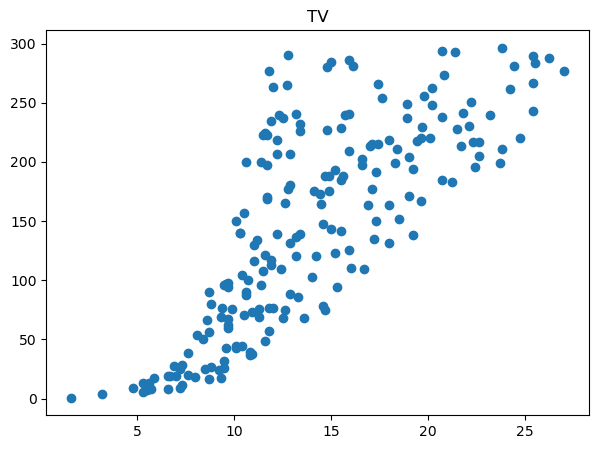

In [38]:
plt.figure(figsize = (7,5))
plt.scatter(data['Sales'], data['TV'])
plt.title('TV')
plt.show()

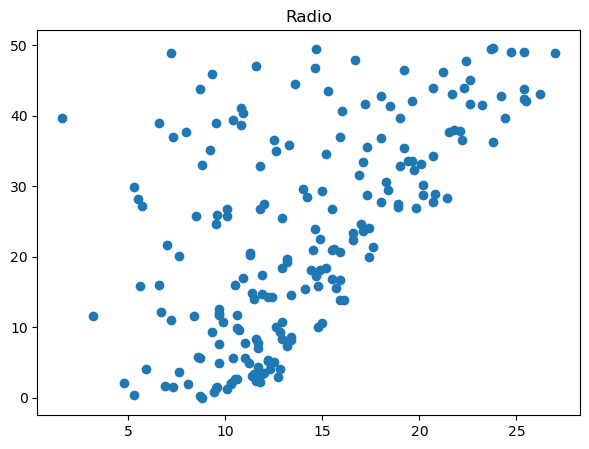

In [35]:
plt.figure(figsize = (7,5))
plt.scatter(data['Sales'], data['Radio'])
plt.title('Radio')
plt.show()

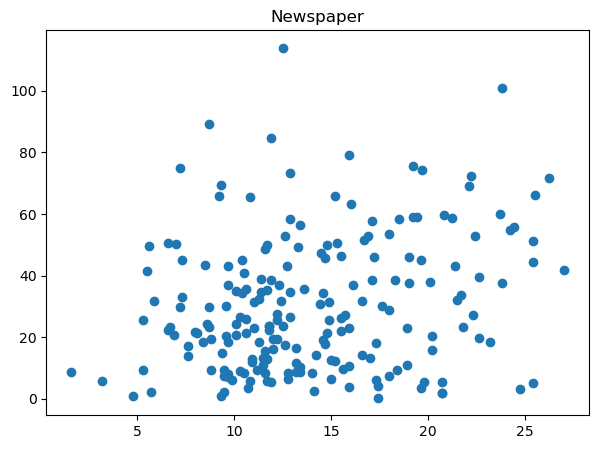

In [36]:
plt.figure(figsize = (7,5))
plt.scatter(data['Sales'], data['Newspaper'])
plt.title('Newspaper')
plt.show()

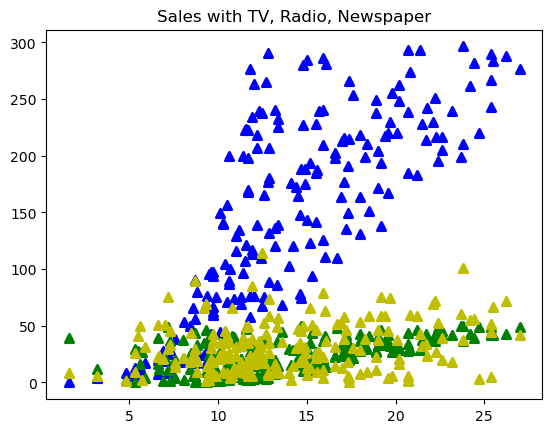

In [60]:
plt.scatter(data['Sales'], data['TV'],color='b',linewidth=2,marker="^")
plt.scatter(data['Sales'], data['Radio'],color='g',linewidth=2,marker="^")
plt.scatter(data['Sales'], data['Newspaper'],color='y',linewidth=2,marker="^")
plt.title('Sales with TV, Radio, Newspaper')
plt.show()

### Line Plot

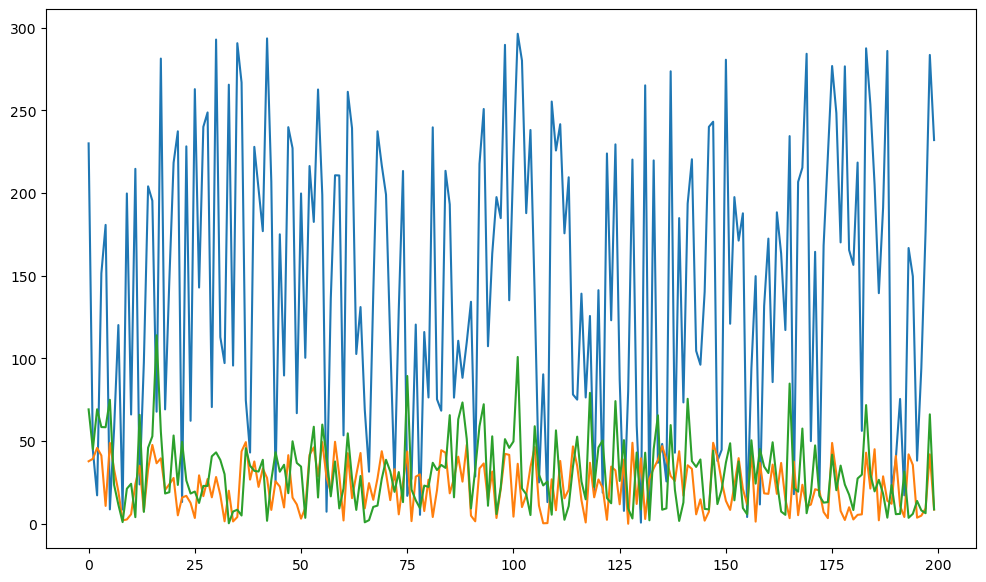

In [44]:
plt.figure(figsize = (12,7))
plt.plot(data['TV'])
plt.plot(data['Radio'])
plt.plot(data['Newspaper'])

### Hist Plot

(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <BarContainer object of 10 artists>)

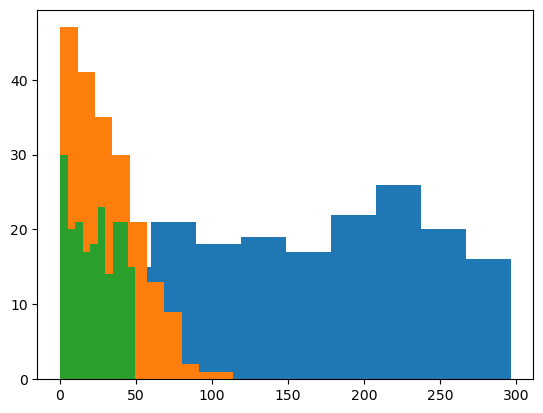

In [47]:
plt.hist(data['TV'])
plt.hist(data['Newspaper'])
plt.hist(data['Radio'])


### Pair Plot

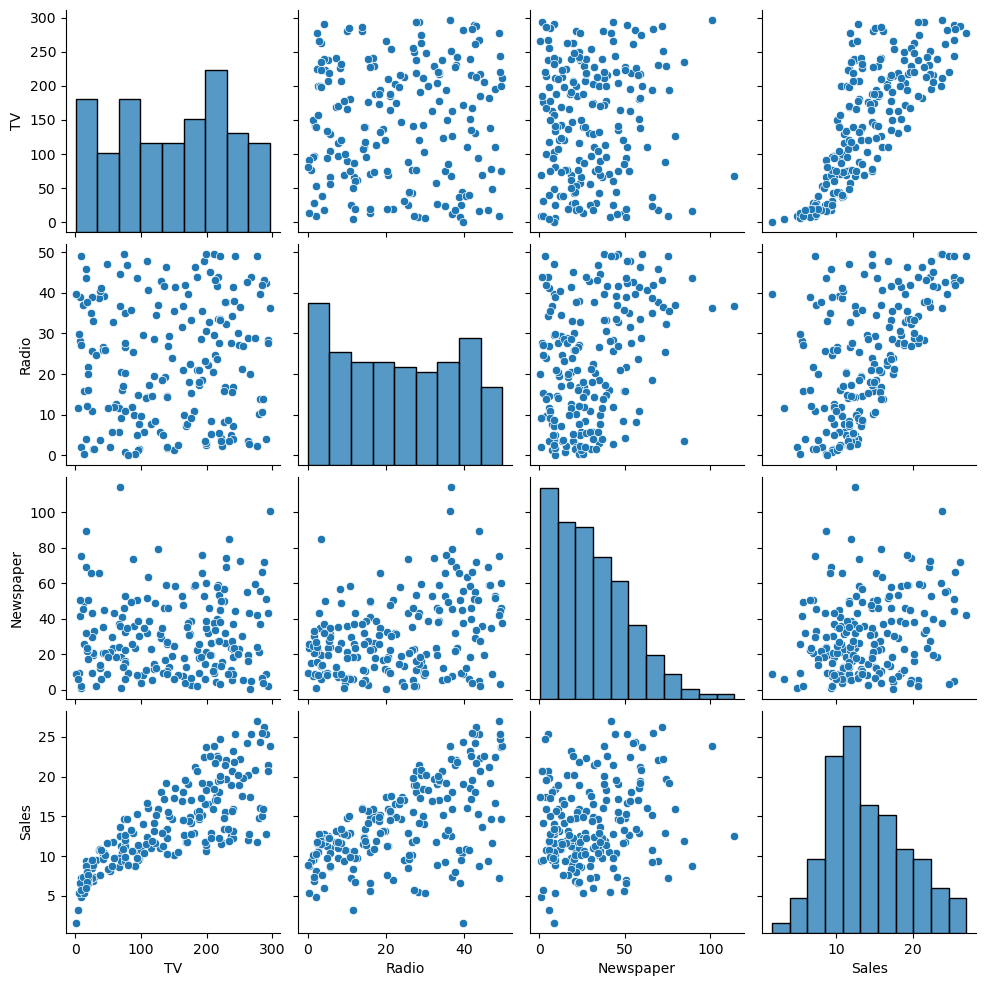

In [49]:
sns.pairplot(data)

### Box Plot

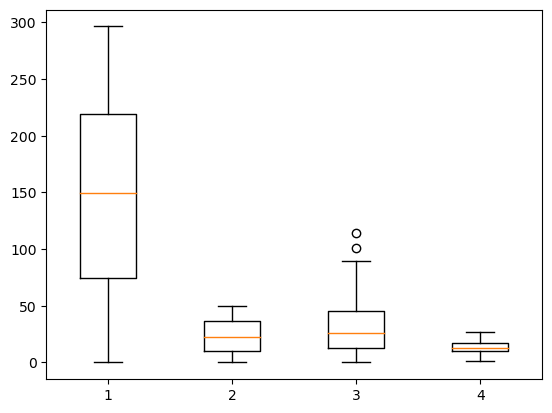

In [62]:
plt.boxplot(data)
plt.show()

### Distibution

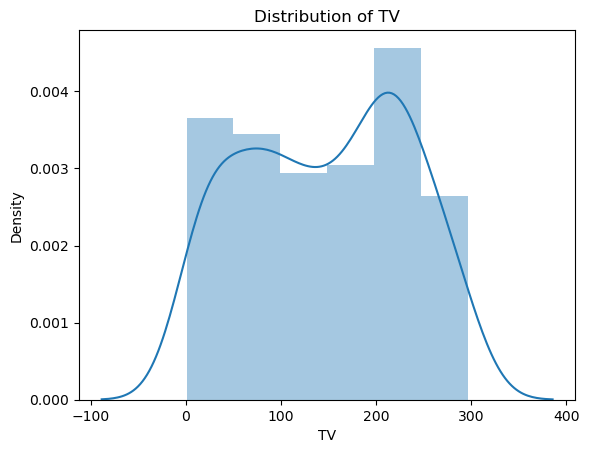

In [70]:
sns.distplot(data['TV'])
plt.title('Distribution of TV')
plt.show()

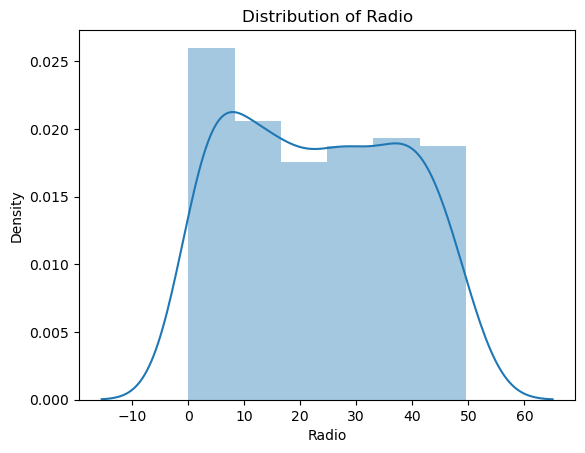

In [71]:
sns.distplot(data['Radio'])
plt.title('Distribution of Radio')
plt.show()

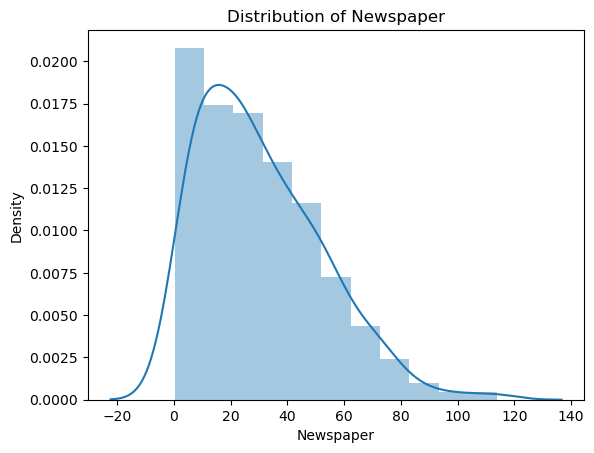

In [72]:
sns.distplot(data['Newspaper'])
plt.title('Distribution of Newspaper')
plt.show()

# 7. Outliers

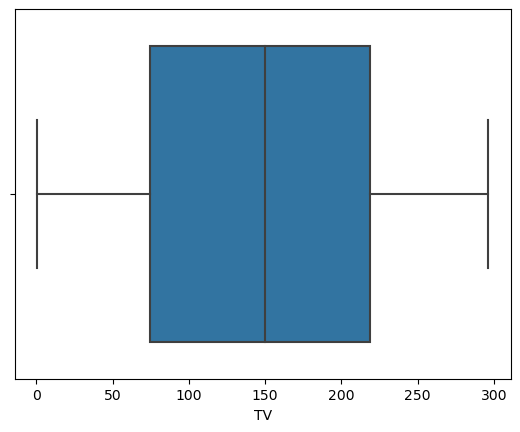

In [53]:
sns.boxplot(data['TV'])
plt.show()


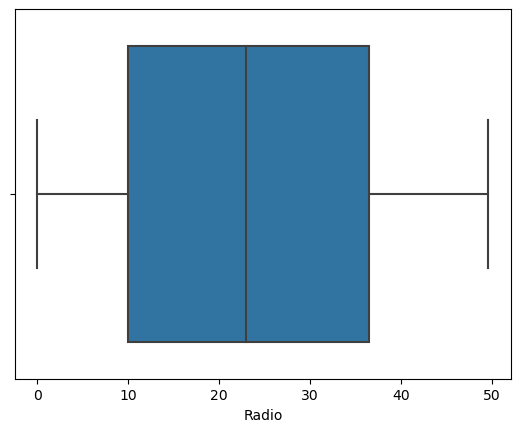

In [54]:
sns.boxplot(data['Radio'])
plt.show()

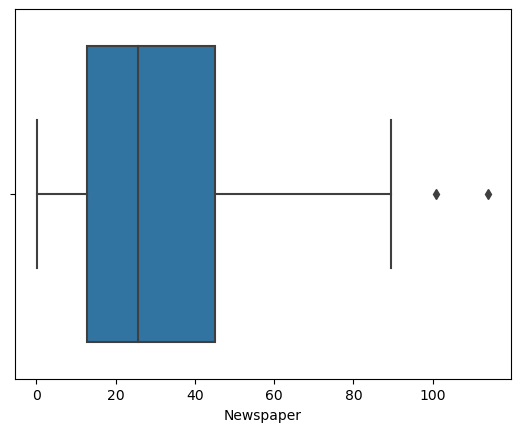

In [55]:
sns.boxplot(data['Newspaper'])
plt.show()

### Dropping Outliers

In [73]:
data = data[data.Newspaper <= 80]

### Updated dataset

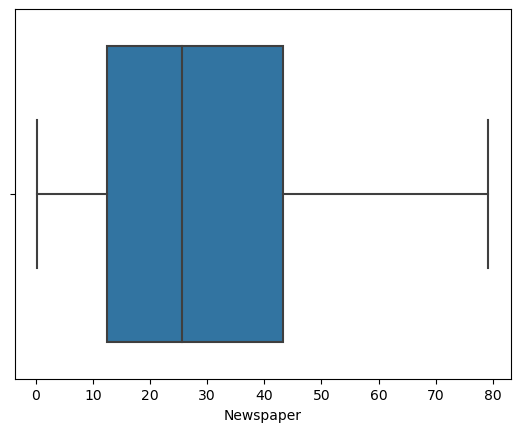

In [75]:
sns.boxplot(data['Newspaper'])
plt.show()

In [77]:
data.describe()

,TV,Radio,Newspaper,Sales
count,196.000000,196.000000,196.000000,196.000000
mean,146.902551,23.126531,29.192347,14.018367
std,85.143688,14.798029,19.703791,5.206699
min,0.700000,0.000000,0.300000,1.600000
25%,75.000000,9.975000,12.550000,10.375000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.425000,35.975000,43.225000,17.400000
max,293.600000,49.600000,79.200000,27.000000


# 8.Building the Model

### 1. splitting into train and test

In [78]:
train, test = train_test_split(data, train_size = 0.7, random_state = 100)

### shape of train and test

In [79]:
train.shape, test.shape

((137, 4), (59, 4))

### Training data

In [81]:
train.head()

,TV,Radio,Newspaper,Sales
74,213.4,24.6,13.1,17.0
3,151.5,41.3,58.5,18.5
185,205.0,45.1,19.6,22.6
27,240.1,16.7,22.9,15.9
91,28.6,1.5,33.0,7.3


### Testing data

In [82]:
test.head()

,TV,Radio,Newspaper,Sales
99,135.2,41.7,45.9,17.2
94,107.4,14.0,10.9,11.5
170,50.0,11.6,18.4,8.4
92,217.7,33.5,59.0,19.4
70,199.1,30.6,38.7,18.3


### 2. separating xtrain ytrain xtest ytest

In [84]:
ytrain = train.pop('Sales')
xtrain = train

In [85]:
ytest = test.pop('Sales')
xtest = test

In [87]:
ytrain

74     17.0
3      18.5
185    22.6
27     15.9
91      7.3
       ... 
89     16.7
106     7.2
68     18.9
25     12.0
8       4.8
Name: Sales, Length: 137, dtype: float64

In [88]:
xtrain

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
27,240.1,16.7,22.9
91,28.6,1.5,33.0
...,...,...,...
89,109.8,47.8,51.4
106,25.0,11.0,29.7
68,237.4,27.5,11.0
25,262.9,3.5,19.5


In [89]:
ytest

99     17.2
94     11.5
170     8.4
92     19.4
70     18.3
134    10.8
77     14.2
130     1.6
113    15.9
104    20.7
83     13.6
121     7.0
182     8.7
131    12.7
66      9.5
167    12.2
32      9.6
115    12.6
53     21.2
11     17.4
76      6.9
15     22.4
171    14.5
98     25.4
153    19.0
152    16.6
161    13.3
127     8.8
177    11.7
175    27.0
65      9.3
47     23.2
181    12.2
114    14.6
118    15.9
33     17.4
155     3.2
196     9.7
122    11.6
102    14.8
42     20.7
174    11.5
60      8.1
7      13.2
84     21.7
128    24.7
29     10.5
30     21.4
126     6.6
41     17.1
87     16.0
120    15.5
154    15.6
163    18.0
1      10.4
79     11.0
172     7.6
137    20.8
160    14.4
Name: Sales, dtype: float64

In [90]:
xtest

,TV,Radio,Newspaper
99,135.2,41.7,45.9
94,107.4,14.0,10.9
170,50.0,11.6,18.4
92,217.7,33.5,59.0
70,199.1,30.6,38.7
134,36.9,38.6,65.6
77,120.5,28.5,14.2
130,0.7,39.6,8.7
113,209.6,20.6,10.7
104,238.2,34.3,5.3


# 9. Training the Model

In [91]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

###  Prediction

In [93]:
lr_predictions = lr.predict(xtest)

In [94]:
lr_predictions

array([17.09094005, 10.46554538,  7.47916489, 19.279616  , 17.81601261,
       12.19616736, 13.80635388, 10.53170767, 16.2774877 , 20.12312011,
       14.59399373,  8.1286872 ,  6.68739265, 15.54809784,  9.04380335,
       13.27645222,  7.72565368, 13.16791575, 20.11224045, 17.12034966,
        4.59276577, 20.94346897, 14.4725294 , 24.12710045, 18.2910086 ,
       16.26665011, 13.77849555,  6.59617584, 12.19912936, 24.76436309,
        7.82005256, 21.61549612, 13.87012698, 15.46206299, 15.89747096,
       18.62196825,  5.3762353 ,  8.14350034, 13.4993865 , 17.48973877,
       21.33489582, 13.60662501,  5.83259313, 12.09913206, 20.78365814,
       22.09468781,  9.32448604, 21.5893202 , 10.8907621 , 17.35841434,
       15.86061992, 14.54702381, 15.39336243, 17.26817975, 12.58270595,
        9.70907108,  7.72290828, 20.91386643, 14.23088579])

# 10. Testing the Model

In [108]:
lr_acc = smf.ols(formula='Sales ~ TV  + Radio + Newspaper', data=data).fit()
lr_acc.conf_int()
lr_acc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     563.2
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           7.32e-95
Time:                        19:42:17   Log-Likelihood:                -377.33
No. Observations:                 196   AIC:                             762.7
Df Residuals:                     192   BIC:                             775.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9108      0.315      9.228      0.000       2.289       3.533
TV             0.0455      0.001     32.168      0.000       0.043       0.048
Radio          0.1868      0.009     21.437      0.000       0.170       0.204
Newspaper      0.0036      0.007      0.544      0.587      -0.009       0.016
==============================================================================
Omnibus:                       62.255   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.959
Skew:                          -1.372   Prob(JB):                     4.11e-36
Kurtosis:                       6.525   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""